fbprophet 🔮

fbprophet is a Python library developed by Facebook for time series predictions. Time series is the field of data analytics and data science that deals with sequentially recorded data.

In [1]:
'''

sudo pip install pystan==2.19.1.1 prophet
!conda install -c conda-forge fbprophet -y
!pip install fbprophet
!pip install --upgrade plotly

'''

'\n\nsudo pip install pystan==2.19.1.1 prophet\n!conda install -c conda-forge fbprophet -y\n!pip install fbprophet\n!pip install --upgrade plotly\n\n'

In [2]:
# FB model for timeseries predictions
from prophet import Prophet
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# data path
df = pd.read_csv('/content/drive/MyDrive/temp_2col.csv')
df

,Unnamed: 0,timestamp,temp
0,0,1876-01-05,-9.8
1,1,1876-01-06,-7.7
2,2,1876-01-07,-6.6
3,3,1876-01-08,-8.9
4,4,1876-01-09,-12.7
...,...,...,...
53590,53590,2022-09-26,13.6
53591,53591,2022-09-27,11.2
53592,53592,2022-09-28,9.4
53593,53593,2022-09-29,9.6


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df1= df[49945:53595]# 10 years dataset
df1

,timestamp,temp
49945,2012-10-03,15.3
49946,2012-10-04,13.7
49947,2012-10-05,11.7
49948,2012-10-06,12.0
49949,2012-10-07,9.0
...,...,...
53590,2022-09-26,13.6
53591,2022-09-27,11.2
53592,2022-09-28,9.4
53593,2022-09-29,9.6


In [7]:
df=df1

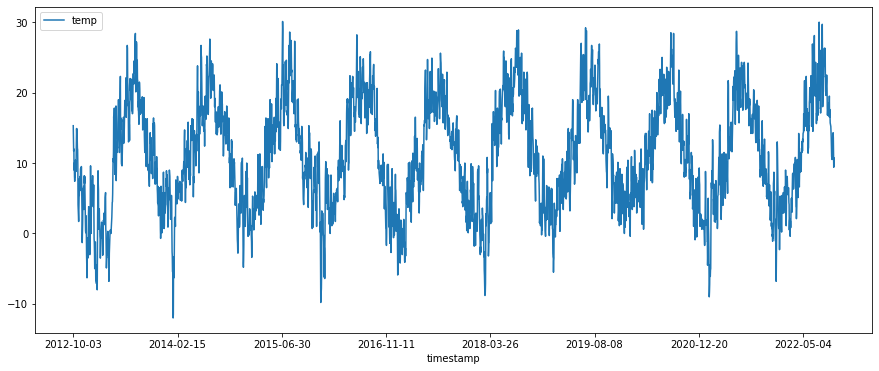

In [8]:
# original data
df.plot(x='timestamp', y='temp', figsize=(15,6));

In [9]:
df.head()

,timestamp,temp
49945,2012-10-03,15.3
49946,2012-10-04,13.7
49947,2012-10-05,11.7
49948,2012-10-06,12.0
49949,2012-10-07,9.0


In [10]:
df.dtypes

timestamp     object
temp         float64
dtype: object

Preparing our data for Prophet

If we check the official [Prophet docs](https://facebook.github.io/prophet/docs/quick_start.html) we will see that there's a few conditions it asks of us:
- Prophet needs the datetime column to be called 'ds'
- Prophet needs the observations column to be called 'y'

In [11]:
# assign the right column names
df.columns = ['ds', 'y']

In [12]:
# convert 'ds' to the right data type
df['ds'] = pd.to_datetime(df['ds'])
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [13]:
# creating the model
model = Prophet()

In [14]:
# training the model
'''we will give it our df DataFrame to fit an algorithm, which the machine will observe fits best all the historic observations we have.'''
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvfp3sla/p8qb02r0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvfp3sla/rugkp31n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44704', 'data', 'file=/tmp/tmpcvfp3sla/p8qb02r0.json', 'init=/tmp/tmpcvfp3sla/rugkp31n.json', 'output', 'file=/tmp/tmpcvfp3sla/prophet_modelpfx2osfv/prophet_model-20221104162026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


the model has found a "logic" that best explains the historic temperature data, but that "logic" is a black box ◼️ 

In [15]:
df

,ds,y
49945,2012-10-03,15.3
49946,2012-10-04,13.7
49947,2012-10-05,11.7
49948,2012-10-06,12.0
49949,2012-10-07,9.0
...,...,...
53590,2022-09-26,13.6
53591,2022-09-27,11.2
53592,2022-09-28,9.4
53593,2022-09-29,9.6


Forecasting and predictions

When we talk about doing predictions programmatically, we talk about two types of predictions:
- In-sample - we remove part of our historic data, and predict it with the model, to see how well it does
- Out-of-sample (future predictions) - after verifying that our model "makes sense", we use it to generate future predictions

In-sample - Let's take the last 12 months of our existing dataset, and see how close are our model's predictions to the real temperature.

In [16]:
sample = df[-365:]# last year
sample

,ds,y
53230,2021-10-01,12.7
53231,2021-10-02,14.8
53232,2021-10-03,18.1
53233,2021-10-04,14.8
53234,2021-10-05,13.1
...,...,...
53590,2022-09-26,13.6
53591,2022-09-27,11.2
53592,2022-09-28,9.4
53593,2022-09-29,9.6


In [17]:
# we want the forecast result to be a DataFrame with one column - 'ds'
# the real value is between 'yhat_lower' and 'yhat_upper'
forecast = model.predict(sample[['ds']])
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
360,2022-09-26,11.091936,8.855856,17.663712,11.091936,11.091936,2.319229,2.319229,2.319229,-0.009159,-0.009159,-0.009159,2.328388,2.328388,2.328388,0.0,0.0,0.0,13.411165
361,2022-09-27,11.091464,8.898796,17.761392,11.091464,11.091464,2.117296,2.117296,2.117296,-0.030327,-0.030327,-0.030327,2.147623,2.147623,2.147623,0.0,0.0,0.0,13.208760
362,2022-09-28,11.090992,8.684479,17.499955,11.090992,11.090992,2.005469,2.005469,2.005469,0.025940,0.025940,0.025940,1.979529,1.979529,1.979529,0.0,0.0,0.0,13.096461
363,2022-09-29,11.090520,8.442537,17.832451,11.090520,11.090520,1.933222,1.933222,1.933222,0.109045,0.109045,0.109045,1.824177,1.824177,1.824177,0.0,0.0,0.0,13.023741
364,2022-09-30,11.090048,8.240549,16.829887,11.090048,11.090048,1.712394,1.712394,1.712394,0.031032,0.031032,0.031032,1.681362,1.681362,1.681362,0.0,0.0,0.0,12.802441


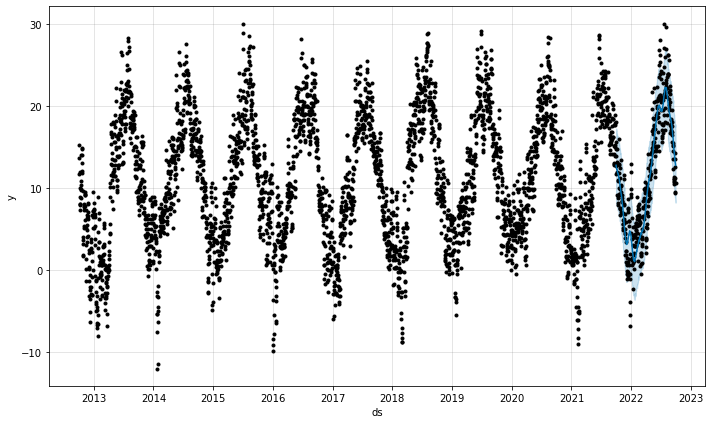

In [18]:
model.plot(forecast);

- The black dots in the chart above is the real data points.
- The dark blue line is the predicted value - it's a line chart between the yhat points that we saw in the forecast DataFrame above.
- The light blue area is the confidence interval - typically a 95% confidence window of the model prediction.

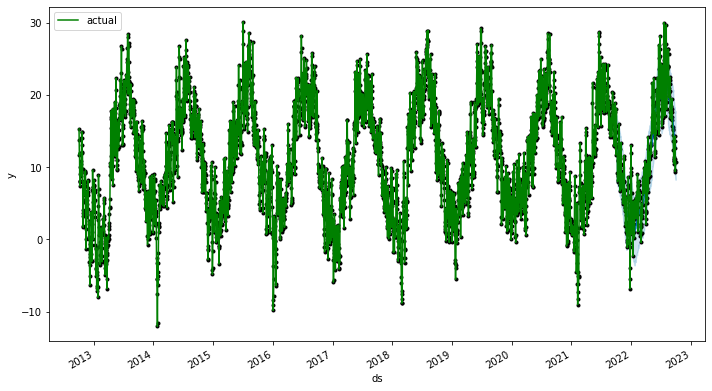

In [19]:
# we can also add a line chart for the historic data 
ax = model.plot(forecast).gca()
df.plot(ax=ax, x='ds', y='y', label='actual', color='g');

We have the real data (y column) from our sample, and we have the predicted 'yhat' from forecast. 

How close is the prediction to the actual temperature?

In [20]:
difference = forecast['yhat'].values - sample['y'].values
difference

array([ 0.1126598 , -2.2353106 , -5.56924556, -2.34960084, -0.76096189,
       -0.8885221 ,  0.31567679,  0.26221632,  2.75796162,  3.95818135,
        3.10225791,  2.70569648,  3.58363179,  0.78456581,  0.71981184,
        2.0971224 ,  1.37277295, -0.61276644, -1.64286184, -4.90124834,
       -1.93833044,  3.35822643,  2.99709215,  2.93532876,  3.71404082,
        0.35032965, -2.33924789, -1.20498119,  0.66540803, -0.71962596,
       -3.90337781, -1.04521708, -0.32860553,  1.9623936 ,  1.97684828,
        0.42640745, -0.78105491, -0.0893301 , -0.65816861, -0.57126904,
        2.58723632,  2.06653217,  0.37858161,  2.13177489,  0.78303645,
        1.07352109,  0.2206077 ,  0.44138959, -2.01360529, -5.83098896,
       -5.70090513, -2.76496608,  1.11939745, -0.22911674, -2.29223819,
       -0.01844763, -0.19359221,  1.99268688,  1.8989876 ,  1.26777423,
        0.11730931, -2.43490878,  1.16153267,  2.31935696,  1.64719087,
        2.501627  ,  2.42288824,  3.62680421,  3.42829966,  4.57

From the above result we can see the **errors** - the difference between the predicted and actual temperatures for the last 12 months.

## Future Forecasting - out-of-sample (new data) predictions

fbprophet comes with some tools for predictions, including the make_future_dataframe() method which allows us to quickly create a set of future dates to use for prediction. And it automatically turns it into a DataFrame.

In [21]:
future = model.make_future_dataframe(freq='MS', periods=24)
future

,ds
0,2012-10-03
1,2012-10-04
2,2012-10-05
3,2012-10-06
4,2012-10-07
...,...
3669,2024-05-01
3670,2024-06-01
3671,2024-07-01
3672,2024-08-01


You'll see that what it does is append the new months to the existing data - very useful, since we want to connect the two for an uninterrupted chart.

The prediction code is the same as before, only now we will be using the `future` DataFrame, not the `sample` any more.

In [22]:
future_forecast = model.predict(future)
future_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-10-03,9.375578,6.540538,15.109479,9.375578,9.375578,1.297327,1.297327,1.297327,0.025940,0.025940,0.025940,1.271387,1.271387,1.271387,0.0,0.0,0.0,10.672905
1,2012-10-04,9.378587,6.326448,15.239046,9.378587,9.378587,1.285024,1.285024,1.285024,0.109045,0.109045,0.109045,1.175979,1.175979,1.175979,0.0,0.0,0.0,10.663611
2,2012-10-05,9.381595,6.224509,14.948788,9.381595,9.381595,1.119015,1.119015,1.119015,0.031032,0.031032,0.031032,1.087983,1.087983,1.087983,0.0,0.0,0.0,10.500610
3,2012-10-06,9.384604,5.911794,14.616730,9.384604,9.384604,0.906209,0.906209,0.906209,-0.099785,-0.099785,-0.099785,1.005995,1.005995,1.005995,0.0,0.0,0.0,10.290813
4,2012-10-07,9.387612,5.855604,14.925208,9.387612,9.387612,0.901817,0.901817,0.901817,-0.026746,-0.026746,-0.026746,0.928563,0.928563,0.928563,0.0,0.0,0.0,10.289429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3669,2024-05-01,10.816704,7.363755,16.108543,10.542345,11.059073,1.026127,1.026127,1.026127,0.025940,0.025940,0.025940,1.000187,1.000187,1.000187,0.0,0.0,0.0,11.842831
3670,2024-06-01,10.802069,13.040074,21.593626,10.504408,11.056513,6.599343,6.599343,6.599343,-0.099785,-0.099785,-0.099785,6.699128,6.699128,6.699128,0.0,0.0,0.0,17.401411
3671,2024-07-01,10.787906,14.757050,23.729879,10.471201,11.073690,8.442802,8.442802,8.442802,-0.009159,-0.009159,-0.009159,8.451961,8.451961,8.451961,0.0,0.0,0.0,19.230707
3672,2024-08-01,10.773271,17.941910,26.360461,10.428649,11.079842,11.308000,11.308000,11.308000,0.109045,0.109045,0.109045,11.198956,11.198956,11.198956,0.0,0.0,0.0,22.081271


In [23]:
future_forecast[3648:]# prediction for 2022-10-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3648,2022-09-29,11.090520,8.320075,17.719350,11.090520,11.090520,1.933222,1.933222,1.933222,0.109045,0.109045,0.109045,1.824177,1.824177,1.824177,0.0,0.0,0.0,13.023741
3649,2022-09-30,11.090048,8.299163,17.629642,11.090048,11.090048,1.712394,1.712394,1.712394,0.031032,0.031032,0.031032,1.681362,1.681362,1.681362,0.0,0.0,0.0,12.802441
3650,2022-10-01,11.089575,7.917107,17.188054,11.089575,11.089954,1.450830,1.450830,1.450830,-0.099785,-0.099785,-0.099785,1.550616,1.550616,1.550616,0.0,0.0,0.0,12.540406
3651,2022-11-01,11.074940,5.121317,13.584322,11.071881,11.079029,-1.873648,-1.873648,-1.873648,-0.030327,-0.030327,-0.030327,-1.843321,-1.843321,-1.843321,0.0,0.0,0.0,9.201292
3652,2022-12-01,11.060778,-0.656086,7.803909,11.052858,11.069366,-7.659906,-7.659906,-7.659906,0.109045,0.109045,0.109045,-7.768950,-7.768950,-7.768950,0.0,0.0,0.0,3.400872
3653,2023-01-01,11.046143,-0.575102,8.266130,11.031002,11.062089,-7.182495,-7.182495,-7.182495,-0.026746,-0.026746,-0.026746,-7.155749,-7.155749,-7.155749,0.0,0.0,0.0,3.863648
3654,2023-02-01,11.031508,-2.514072,6.435065,11.006552,11.057137,-9.245345,-9.245345,-9.245345,0.025940,0.025940,0.025940,-9.271285,-9.271285,-9.271285,0.0,0.0,0.0,1.786163
3655,2023-03-01,11.018289,-0.367206,8.658360,10.984419,11.053625,-6.848859,-6.848859,-6.848859,0.025940,0.025940,0.025940,-6.874799,-6.874799,-6.874799,0.0,0.0,0.0,4.169430
3656,2023-04-01,11.003654,2.915956,11.761287,10.959093,11.049313,-3.647288,-3.647288,-3.647288,-0.099785,-0.099785,-0.099785,-3.547503,-3.547503,-3.547503,0.0,0.0,0.0,7.356366
3657,2023-05-01,10.989491,7.256016,16.581892,10.929824,11.048784,0.889535,0.889535,0.889535,-0.009159,-0.009159,-0.009159,0.898694,0.898694,0.898694,0.0,0.0,0.0,11.879026


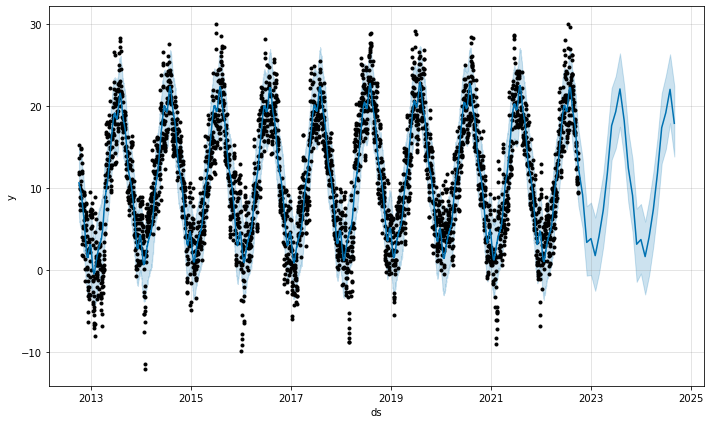

In [24]:
model.plot(future_forecast); # visualization of future_forecast

You can also see how the model looks for patterns in historic data, but without overfitting - you can see that some black dots are not covered by the blue area. Which is normal, because not every month follows the same pattern.

# Seasonality + Trend

To understand our results better, we need to explore the **components** that influence the temperature. The main two are seasonality and trend over the year:

- **Seasonality** is the waves in our data. Looking at those can help find patterns of highs and lows.
- **Trend** is the general direction of the data. This helps us see whether we're increasing or decreasing over time.


And again `fbprophet` has helpful functions ready to use - let's use the [`plot_components()`](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html) function on our `model`.

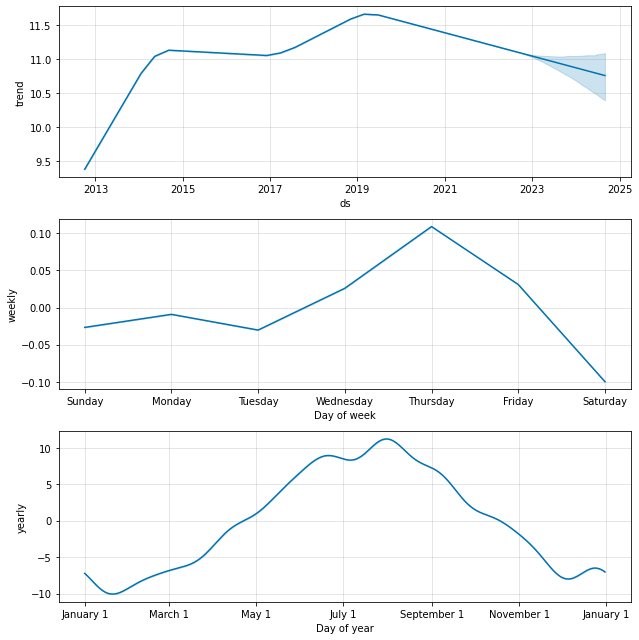

In [25]:
model.plot_components(future_forecast);

# Evaluation

In [26]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 120 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.1 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6637636 sha256=58d4045eaa9985da1e4b67b20ad9f1edf712673efc5b705a2c798b9ec5811324
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [27]:
from fbprophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
plot_plotly(model, future_forecast)

`fbprophet` comes with a handy [Diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html) library built in.

[cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) - to run through the same process multiple times and see how consistent are our results. 

This cross validation procedure can be done automatically for a range of historical cutoffs using the cross_validation function. We specify the forecast horizon (horizon), and then optionally the size of the initial training period (initial) and the spacing between cutoff dates (period). By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon.

In [28]:
from fbprophet.diagnostics import cross_validation

In [29]:
# prediction horizon=how frequently you want to predict
# period=how frequently to stop and do a prediction
# cut back half a year every time till the moment we will run out of our data
df_cv = cross_validation(model, period='180 days', horizon='365 days')

df_cv

INFO:fbprophet:Making 13 forecasts with cutoffs between 2015-11-01 00:00:00 and 2021-09-30 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvfp3sla/st64f4ey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvfp3sla/p6qgo55i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96253', 'data', 'file=/tmp/tmpcvfp3sla/st64f4ey.json', 'init=/tmp/tmpcvfp3sla/p6qgo55i.json', 'output', 'file=/tmp/tmpcvfp3sla/prophet_modelhg_bz_b1/prophet_model-20221104162222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvfp3sla/8o1zz6qz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvfp3sla/pe1mtts8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-11-02,9.208978,5.029672,13.719330,6.9,2015-11-01
1,2015-11-03,8.923389,4.738497,13.435222,4.4,2015-11-01
2,2015-11-04,8.484795,3.955422,12.638500,3.7,2015-11-01
3,2015-11-05,8.427423,4.431290,12.447798,8.8,2015-11-01
4,2015-11-06,8.243837,3.913919,12.625712,11.6,2015-11-01
...,...,...,...,...,...,...
4740,2022-09-26,12.386981,7.534299,16.735516,13.6,2021-09-30
4741,2022-09-27,12.150133,7.702380,16.626964,11.2,2021-09-30
4742,2022-09-28,11.942355,7.460746,16.297710,9.4,2021-09-30
4743,2022-09-29,11.912147,7.411508,16.158430,9.6,2021-09-30


it ran the process **13 times**, each time taking a piece of the data as the "seen" data, and predicting the next period, as though it is "unseen", trying to predict up to one year ahead each time. 


The output of cross_validation is a dataframe with the true values y and the out-of-sample forecast values yhat, at each simulated forecast date and for each cutoff date. In particular, a forecast is made for every observed point between cutoff and cutoff + horizon. This dataframe can then be used to compute error measures of yhat vs. y.

we're storing a bunch of data about the real temparature throughout the years (y column), the predicted temperature (yhat) as well as the cutoffs - the time blocks used to simulate "unseen" data, so we can better understand our model performance.

Are we getting consistent results? Are the good?



let's interpret the results based on `mae` - [**Mean Absolute Error**](https://en.wikipedia.org/wiki/Mean_absolute_erro). This is the average difference that we're getting between the real temperatures and predicted ones.

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



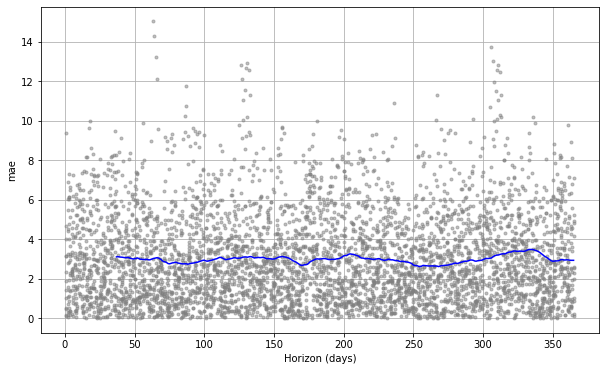

In [30]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

* Our horizontal (`x`) axis is how many days into the future we're predicting. As you can see, we tried to predict up to a maximum of 365 days (1 year). That's our **horizon**
* Our vertical (`y`) axis is the **Mean Absolute Error** - the average error in our temperature predictions. We can see we are typically making errors of around 2-4 degrees Celsius.




In [31]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,37 days,14.614993,3.822956,3.095736,0.242560,0.347024,0.721681
1,38 days,14.659880,3.828822,3.109107,0.244277,0.354135,0.719734
2,39 days,14.552870,3.814822,3.093283,0.242970,0.356580,0.727199
3,40 days,14.511208,3.809358,3.083415,0.242970,0.359892,0.731256
4,41 days,14.501330,3.808061,3.079561,0.244891,0.363468,0.732230


The [performance_metrics](https://facebook.github.io/prophet/docs/diagnostics.html) utility can be used to compute some useful statistics of the prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff (how far into the future the prediction was). The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), median absolute percent error (MDAPE) and coverage of the yhat_lower and yhat_upper estimates. These are computed on a rolling window of the predictions in df_cv after sorting by horizon (ds minus cutoff). By default 10% of the predictions will be included in each window, but this can be changed with the rolling_window argument.